# Method to Quantify Minimum Yardage and Touchdowns Saved by Defensive Tackles
# Introduction

Not all tackles are created equal. A tackle that would have prevented the ball carrier from gaining an additional 20 yards or scoring a touchdown has a greater impact on the outcome of a game than a tackle that would have only prevented the ball carrier from taking a few extra steps before being tackled by another defender. Counting tackles might seem like a straightforward metric to assess defensive performance, but it falls short of accurately capturing the true value of a tackle in football. While offensive metrics account for yardage gained or touchdowns scored, no equivalent metrics exist for the defense. Therefore, we propose simple, yet effective, metrics to quantify defensive impact by calculating minimum yardage and touchdowns saved by tackles. 

# Method
In order to calculate the minimum yardage saved by a successful tackle, we start by treating the initial tackle as if it were unsuccessful and making the following assumptions for the sake of simplicity:
	The ball carrier is going to run in a straight line perpendicular to the goal line immediately following the missed tackle. If the ball carrier is the quarterback then he will also run along a similar path and not attempt to pass the ball. 
	The other defenders (those not involved in the initial tackle) will run in a straight line and attempt to tackle the ball carrier along his path to the goal line.
	If a defender reaches the ball carrier along his path it will result in a successful tackle. 
	The ball carrier and defenders have identical speed and acceleration at each point in time following the missed tackle. 
	The minimum yardage saved is determined by how far the ball carrier runs between the initial tackle and the next tackle.
Based on the above assumptions, we can imagine a circle centered on the intersection of the ball carrier’s path and the goal line. This circle has a radius equal to the distance between the ball carrier at the location of the initial tackle and the goal line and represents the area in which a defender must reside at the time of the initial tackle in order to be capable of reaching the ball carrier before he crosses the goal line. In other words, because we are assuming that the ball carrier and defenders have identical speed and acceleration, any defender who is further away from the center of the circle than the ball carrier will not be able to catch him before he crosses the goal line. If there are no capable defenders within this circle at the time of the initial tackle, then the ball carrier will be unimpeded on his path to the goal line and the initial tackle is considered to have saved a touchdown. The radius of the circle becomes bigger the further away from the goal line the ball carrier is during the initial tackle and thus encompasses more defenders who are capable of making the next tackle. Conversely, the radius of the circle decreases the closer the ball carrier is to the goal line during the initial tackle and allows for fewer defenders who are capable of making the next tackle, resulting in a higher likelihood of a touchdown being saved by the initial tackle.  


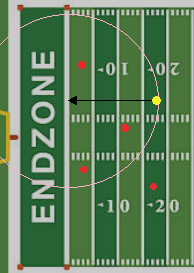
 
Figure 1: Circle (pink) of defenders (red) capable of tackling the ball carrier (yellow) running perpendicular to goal line 

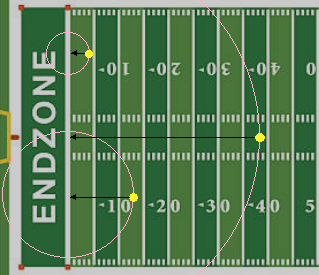
 
Figure 2: Circles (pink) of various radii based on location of ball carrier (yellow) during initial tackle

Moreover, because we are assuming identical speed and acceleration, the ball carrier and the capable defender will have traveled the same distance to the point of convergence where the next tackle occurs. Therefore, if we connect the coordinates of the ball carrier at the initial tackle, the coordinates of a capable defender, and the coordinates of their point of convergence where the next tackle would occur, then the result would be an isosceles triangle. Given the coordinates of the ball carrier and defender, the base of the triangle can be calculated from the Euclidean distance between the ball carrier and defender. The base angle, theta, between the defender and path of the ball carrier, as well as the x coordinate of the point of convergence, can be calculated using basic trigonometric relationships. The yardage saved is simply the difference between the x coordinate of the ball carrier at the initial tackle and the x coordinate of the point of convergence where the next tackle is made. If this value is calculated for each capable defender, then the minimum yardage saved is the smallest of the resulting values. If the initial tackle was an assist, then the yardage saved or touchdown saved is divided by 2. 
 
 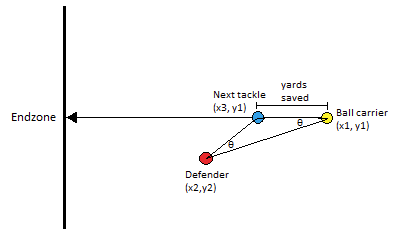
 
 
Figure 3: Isosceles triangle formed by connecting the coordinates of the ball carrier (yellow), defender (red), and point of convergence (blue)

# Discussion
The main advantage of this method for is its simplicity. These metrics can be calculated from just the x and y coordinates of the ball carrier and defenders in the circle during a tackle event. Furthermore, the metrics can be improved by taking into account additional variables such as the differences in speed and acceleration between ball carrier and defenders. For example, a tackle on a tight end would likely result in less yardage saved on average than a tackle on a wide receiver. This method can be further improved by taking into account more complex variables such as offensive blocking and exploring different ball carrier paths. 
The main disadvantage of this method is that it does not take into account potential passing yardage saved by a quarterback sack or factors such as quarterback mobility. The method assumes that the minimum yardage saved by a quarterback sack is determined by the quarterback running along the shortest path to the end zone which would typically result in him running straight into the vicinity of the defensive line. 

# Conclusion
We can use this method to calculate the total yards and touchdowns saved for each defender through the first 9 weeks of the 2022 NFL season and obtain the following rankings for each metric:

 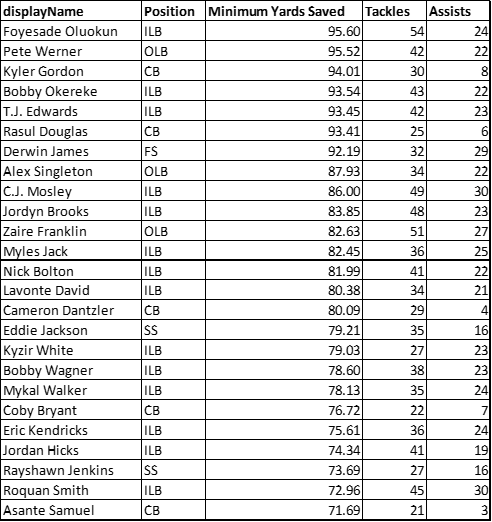
 
Figure 4: Top 25 defenders ranked by minimum yards saved for weeks 1 through 9

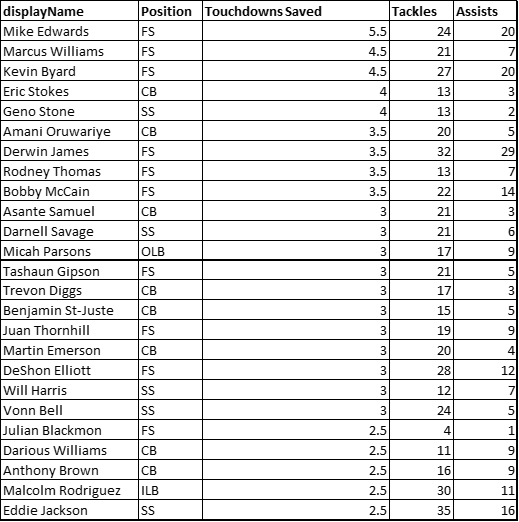
 
Figure 5: Top 25 defenders ranked by touchdowns saved for weeks 1 through 9

We can gain a few insights from the rankings above. The first thing we see from the rankings is that linebackers save the most yards, whereas safeties and cornerbacks save the most touchdowns. Secondly, we cannot fail to notice that Derwin James has the 7th most yards saved and is tied for 6th most touchdowns saved, certainly justifying him being the highest-paid safety in NFL history. Lastly, and perhaps most importantly, we can infer that although Asante Samuel may not have the most impressive tackle count, what he lacks in quantity he surely makes up in quality as he is the only other defender besides Derwin James that appears in the top 25 rankings for both yards saved and touchdowns saved. Tracking yards and touchdowns saved can highlight defenders who consistently prevent big plays, even if their raw tackle count isn't high. This could in turn reward players who make impactful tackles and can ultimately inform scouting, drafting, and contract negotiations beyond simple tackle counts. 
These are also valuable metrics because they can be used to create additional metrics. For example, we can assign a value to each defensive tackle based on what fraction of the distance to the goal line was saved by the tackle. We then multiple this fraction by 6 because if the fraction is 1 then a touchdown, or 6 points, would have been saved by the tackle. Clearly, tackles near the goal line would hold much more weight in this metric. 

Tackle Value=6 ×  (Minimum Yards Saved)/(Ball carrier distance to goal line)

Quantifying yardage and touchdowns saved offers a more comprehensive and nuanced perspective on defensive performance in the NFL. It's a valuable tool for evaluating players, informing strategic decisions, and enhancing fan engagement, leading to a better understanding of the true impact of tackles on the game.



# APPENDIX

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


In [2]:
#Load Datasets
games_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/games.csv")
play_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')
players_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/players.csv")
tackles_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tackles.csv")
tracking_df = pd.concat([pd.read_csv(f"/kaggle/input/nfl-big-data-bowl-2024/tracking_week_{i}.csv") for i in range(1, 10)])
print('Datasets Loaded Successfully')

Datasets Loaded Successfully


In [3]:
# Define the merge_info function
def merge_info(df1, df2, keys, how="inner"):
    print(f"Before merging:")
    print(f"Size of first dataframe: {df1.shape}")
    print(f"Size of second dataframe: {df2.shape}")

    if df1.empty or df2.empty:
        print("One or both DataFrames are empty. Skipping merge.")
        return None

    merged_df = pd.merge(df1, df2, on=keys, how=how)

    print(f"After merging on {keys}:")
    print(f"Size of merged dataframe: {merged_df.shape}")
    return merged_df

In [4]:
def process_play(tackles_row, tracking_df):
    endzone_x=110
    endzone_y = 53.3
   # Filter relevant defenders within the circle and with tackle events
    relevant_tracking_df = tracking_df[
        (tracking_df['gameId'] == tackles_row['gameId']) &
        (tracking_df['playId'] == tackles_row['playId']) &
        (tracking_df['nflId'] != tackles_row['nflId']) &
        ~(tracking_df['tackle'] == 1) &  # Exclude rows where tackle is 1
        ~(tracking_df['assist'] == 1)   # Exclude rows where assist is 1
    ]
    relevant_tracking_df.to_csv('/kaggle/working/relevant_tracking_df.csv')
    
    if tackles_row['playDirection'] == 'right':
        end_x = endzone_x # Right end zone
    elif tackles_row['playDirection'] == 'left':
        end_x = 10 # Left end zone
    else:
       # Handle cases where play direction is unknown or invalid
       raise ValueError("Invalid play direction:", tackles_row['playDirection'])

    # Calculate circle origin at goal line intersection
    if tackles_row['playDirection'] == 'right':
        origin_x = endzone_x # Adjust to right end zone if play direction is right
    else:
        origin_x = 10 # Adjust to left end zone if play direction is left
    origin_y = tackles_row['y']

   # circle (updated center and radius)
    circle_center_x = origin_x # Center at the origin on the goal line
    circle_center_y = origin_y
    circle_radius = abs(tackles_row['x'] - origin_x) # Radius to ball carrier

    defenders_in_range = relevant_tracking_df[
       ((relevant_tracking_df['x'] - circle_center_x)**2 +
        (relevant_tracking_df['y'] - circle_center_y)**2) < circle_radius**2
    ]
    # Filter for opposing players
    ball_carrier_club = tackles_row['club']
    defenders_in_range = defenders_in_range[defenders_in_range['club'] == ball_carrier_club]
    
    # Filter out the initial tackler and assist!!!!!!!  from defenders_in_range
    initial_tackler_nflid = tackles_row['nflId']  # Get the NFL ID of the tackler
    defenders_in_range = defenders_in_range[defenders_in_range['nflId'] != initial_tackler_nflid]
    
    # Add the touchdown_saved column and set values based on defenders_in_range emptiness
    touchdowns_saved = 0  # Initialize to 0
    if defenders_in_range.empty:
        touchdowns_saved = 1  # Set to 1 if no defenders were in range


        
    if not defenders_in_range.empty:
    # Apply the calculate_min_yard_saved function to each row and return the minimum value
        defenders_in_range['yards_saved'] = defenders_in_range.apply(
        lambda row: calculate_min_yard_saved(row, tackles_row['x'], tackles_row['y'], tackles_row['playDirection']),
        axis=1
    )
    else:
        defenders_in_range['yards_saved'] = None
    
    if not defenders_in_range.empty:
        min_yards_saved = defenders_in_range['yards_saved'].min()
    else:
        min_yards_saved = None



    return defenders_in_range, origin_x, origin_y, circle_center_x, circle_center_y, circle_radius, end_x, relevant_tracking_df, touchdowns_saved, min_yards_saved



In [5]:
def calculate_min_yard_saved(defender_row, ball_carrier_x, ball_carrier_y, play_direction):
    """Calculates the minimum yards saved by a defender based on their position,
       the ball carrier's position, and the play direction.
    """

    Cx = defender_row['x']
    Cy = defender_row['y']
    AB = np.sqrt(((Cx - ball_carrier_x) ** 2) + ((Cy - ball_carrier_y) ** 2))

    # Determine theta based on play direction
    if play_direction == 'right':
        theta = np.arccos((Cx - ball_carrier_x) / AB)
    else:
        # Assuming play direction is 'left'
        theta = 2 * np.pi - np.arccos((Cx - ball_carrier_x) / AB)

    Ax = ball_carrier_x + AB * np.cos(theta)
    Ay = ball_carrier_y
    return abs(Ax - ball_carrier_x)

     # Calculate distance to goal line
    distance_to_goal_line = abs(goal_line_x - ball_carrier_x)

    return abs(Ax - ball_carrier_x), distance_to_goal_line

In [6]:
def create_and_show_plot(tackles_row, defenders_in_range, origin_x, origin_y, circle_center_x, circle_center_y, circle_radius, end_x,relevant_tracking_df):

    # Field outline and markings (already provided)
    field = create_football_field()
 
    # Ball carrier position
    plt.scatter(tackles_row['x'], tackles_row['y'], color='red', label='Ball Carrier')
    plt.scatter(relevant_tracking_df['x'], relevant_tracking_df['y'])

    # Defenders within the circle
    defenders_x = defenders_in_range['x'].tolist()
    defenders_y = defenders_in_range['y'].tolist()
    plt.scatter(defenders_x, defenders_y, color='blue', label='Defenders')

    # circle
    theta = np.linspace(180, 360, 100)  # Generate angles for circle
    a = circle_radius
    x_circle = a * np.cos(theta * np.pi / 180) + circle_center_x
    y_circle = a * np.sin(theta * np.pi / 180) + circle_center_y
    plt.plot(x_circle, y_circle, color='black', linestyle='--')

    # Line towards the correct end zone
    plt.plot([tackles_row['x'], end_x], [tackles_row['y'], tackles_row['y']],
             color='black', linestyle='--', alpha=0.5)

    # Black dot markers
    plt.plot(origin_x, origin_y, color='black', marker='o')
    plt.annotate(f"Ball Carrier: ({tackles_row['x']:.1f}, {tackles_row['y']:.1f})",
                 xy=(tackles_row['x'], tackles_row['y']), xytext=(5, -5),  # Adjust text offset as needed
                 textcoords='offset points', ha='left', va='top')

    for i, (x, y) in enumerate(zip(defenders_x, defenders_y)):
        plt.annotate(f"Defender {i+1}: ({x:.1f}, {y:.1f})",
                     xy=(x, y), xytext=(5, -5),  # Adjust text offset as needed
                     textcoords='offset points', ha='left', va='top')

    plt.show()  # Display the plot


In [7]:
#Load Datasets
games_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/games.csv")
play_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')
players_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/players.csv")
tackles_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tackles.csv")
tracking_df = pd.concat([pd.read_csv(f"/kaggle/input/nfl-big-data-bowl-2024/tracking_week_{i}.csv") for i in range(1, 10)])
print('Datasets Loaded Successfully')



Datasets Loaded Successfully


In [8]:
tackles_df = tackles_df[((tackles_df['tackle'] == 1) | (tackles_df['assist'] == 1))]
tackles_df = tackles_df[['gameId', 'playId', 'nflId', 'tackle', 'assist']]
tackles_df.to_csv('/kaggle/working/tackles_filtered_tackle_assist.csv')

tracking_df = tracking_df[(tracking_df['event'] == 'tackle')]

import pandas as pd

# Merge the datasets on the relevant columns
merged_df = merge_info(tracking_df, tackles_df, keys=['gameId', 'playId', 'nflId'],how='left')

# Fill missing values with 0 (for rows without matching tackles)
merged_df[['tackle', 'assist']] = merged_df[['tackle', 'assist']].fillna(0)

# Assign the merged data back to the tracking dataset
tracking_df = merged_df
tracking_df.to_csv('/kaggle/working/tracking_tackles_merged.csv')
num_rows = tracking_df.shape[0]
print("Number of rows in tracking_df:", num_rows)

merged_tackle=merge_info(tackles_df,tracking_df,  keys=['gameId', 'playId', 'nflId'],how='inner')
merged_tackle.to_csv('/kaggle/working/tackles_merged.csv')


Before merging:
Size of first dataframe: (230924, 17)
Size of second dataframe: (15413, 5)
After merging on ['gameId', 'playId', 'nflId']:
Size of merged dataframe: (230924, 19)
Number of rows in tracking_df: 230924
Before merging:
Size of first dataframe: (15413, 5)
Size of second dataframe: (230924, 19)
After merging on ['gameId', 'playId', 'nflId']:
Size of merged dataframe: (13392, 21)


In [9]:

# Keep only the first occurrence of each (gameId, playId) combination
unique_merged_tackle = merged_tackle.drop_duplicates(subset=['gameId', 'playId'], keep='first')
unique_merged_tackle.to_csv('/kaggle/working/unique_tackles_merged.csv', index=False)

#tackles_row = tackles_df.iloc[5]  # Example: Accessing the 1st row

# Initialize the "minimum yards saved" column in tackles_df
unique_merged_tackle['minimum yards saved'] = np.nan
unique_merged_tackle['touchdowns_saved'] = 0  # Initialize the column with 0 values
unique_merged_tackle.to_csv('/kaggle/working/tracking_tackles_merged_minyard_touchdfdown_empty.csv')

# Create an empty list to store minimum yards saved for each play
min_yards_saved_list = []

# Iterate through each row of tackles_df
for index, tackles_row in unique_merged_tackle.iterrows():
    
    # Create a copy of the current tackles row
    current_tackles_row = tackles_row.copy()
    
    # Process the play to get defenders_in_range and calculate min_yard_saved
    defenders_in_range, origin_x, origin_y, circle_center_x, circle_center_y, circle_radius, end_x, relevant_tracking_df,touchdowns_saved, min_yards_saved = process_play(current_tackles_row, tracking_df)

    #create_and_show_plot(current_tackles_row, defenders_in_range, circle_center_x, circle_center_y, circle_center_x, circle_center_y, circle_radius, end_x,relevant_tracking_df)
    # Update the minimum yards saved list
    min_yards_saved_list.append(min_yards_saved)
    unique_merged_tackle.loc[index, 'touchdowns_saved'] = touchdowns_saved

unique_merged_tackle['minimum yards saved'] = min_yards_saved_list

defenders_in_range.to_csv('/kaggle/working/defenders_in_range.csv')
unique_merged_tackle.to_csv('/kaggle/working/tackles_df_minyardssaved_touchdown_filled.csv')


/tmp/ipykernel_19/3805149540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_tackle['minimum yards saved'] = np.nan
/tmp/ipykernel_19/3805149540.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_tackle['touchdowns_saved'] = 0  # Initialize the column with 0 values
/tmp/ipykernel_19/3805149540.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [10]:


# 1. Create new columns in merged_tackle
merged_tackle['minimum yards saved'] = np.nan
merged_tackle['touchdowns_saved'] = np.nan

# 2. Populate values from unique_merged_tackle
for index, row in unique_merged_tackle.iterrows():
    game_id = row['gameId']
    play_id = row['playId']
    min_yards_saved = row['minimum yards saved']
    touchdowns_saved = row['touchdowns_saved']

    # Select matching rows in merged_tackle and update values
    merged_tackle.loc[(merged_tackle['gameId'] == game_id) & (merged_tackle['playId'] == play_id),
                      ['minimum yards saved', 'touchdowns_saved']] = [min_yards_saved, touchdowns_saved]

# Save the updated merged_tackle
merged_tackle.to_csv('/kaggle/working/updated_merged_tackle.csv', index=False)


In [11]:


# Create missing columns safely using .loc
merged_tackle.loc[:, 'Adjusted Yards Saved'] = np.nan
merged_tackle.loc[:, 'Adjusted Touchdowns Saved'] = np.nan

# Condition for tackle vs. assist
for index, row in merged_tackle.iterrows():
    if row['tackle_y'] == 1:  # Check for tackle events (value 1)
        merged_tackle.loc[index, 'Adjusted Yards Saved'] = row['minimum yards saved']
        merged_tackle.loc[index, 'Adjusted Touchdowns Saved'] = row['touchdowns_saved']
    else:  # Handle assist tackles (assuming 'tackle' column is 0 for assists)
        merged_tackle.loc[index, 'Adjusted Yards Saved'] = row['minimum yards saved'] / 2
        merged_tackle.loc[index, 'Adjusted Touchdowns Saved'] = row['touchdowns_saved'] / 2
        
merged_tackle = pd.merge(merged_tackle, players_df[['nflId', 'position']], on='nflId', how='left')
merged_tackle.to_csv('/kaggle/working/tackles_df_minyardssaved_touchdowns_final.csv')

# Create final_dataset with the correct columns
final_tackles_df = merged_tackle[['nflId','position', 'displayName', 'Adjusted Yards Saved', 'Adjusted Touchdowns Saved','tackle_y','assist_y']]

final_tackles_df.to_csv('/kaggle/working/final_tackles_df.csv')


# 3. Create datasets for best yards and  
best_yards_savers = final_tackles_df.groupby(['displayName','position'])
best_yards_savers = best_yards_savers[['Adjusted Yards Saved', 'tackle_y', 'assist_y']].sum()
best_yards_savers = best_yards_savers.sort_values(by='Adjusted Yards Saved', ascending=False).head(25)
print(best_yards_savers.head(10))
best_yards_savers = best_yards_savers.rename(columns={'tackle_y': 'tackle'})
best_yards_savers = best_yards_savers.rename(columns={'assist_y': 'assist'})

best_yards_savers.to_csv('/kaggle/working/best_yards_savers.csv')


best_touchdown_savers= final_tackles_df.groupby(['displayName','position'])
best_touchdown_savers = best_touchdown_savers[['Adjusted Touchdowns Saved', 'tackle_y', 'assist_y']].sum()
best_touchdown_savers = best_touchdown_savers.sort_values(by='Adjusted Touchdowns Saved',ascending=False).head(25)
print(best_touchdown_savers.head(10))
best_touchdown_savers = best_touchdown_savers.rename(columns={'tackle_y': 'tackle'})
best_touchdown_savers = best_touchdown_savers.rename(columns={'assist_y': 'assist'})
best_touchdown_savers.to_csv('/kaggle/working/best_touchdown_savers.csv')

                           Adjusted Yards Saved  tackle_y  assist_y
displayName      position                                          
Foyesade Oluokun ILB                     95.605      54.0      24.0
Pete Werner      OLB                     95.515      42.0      22.0
Kyler Gordon     CB                      94.010      30.0       8.0
Bobby Okereke    ILB                     93.540      43.0      22.0
T.J. Edwards     ILB                     93.450      42.0      23.0
Rasul Douglas    CB                      93.405      25.0       6.0
Derwin James     FS                      92.190      32.0      29.0
Alex Singleton   OLB                     87.930      34.0      22.0
C.J. Mosley      ILB                     85.995      49.0      30.0
Jordyn Brooks    ILB                     83.850      48.0      23.0
                          Adjusted Touchdowns Saved  tackle_y  assist_y
displayName     position                                               
Mike Edwards    FS                      

In [12]:
# Function to create football field
def create_football_field():

    field = plt.figure(figsize=(18.95, 10))

    # Main field (adjusted width to accommodate extended end zones)
    plt.gca().add_patch(patches.Rectangle((10, 0), 100, 53.3, linewidth=0.1,
                    edgecolor='r', facecolor='green', zorder=0))

    # End zones (extended to 20 yards)
    plt.gca().add_patch(patches.Rectangle((0, 0), 10, 53.3, linewidth=0.1,
                    edgecolor='r', facecolor='grey', zorder=0))  # Left end zone
    plt.gca().add_patch(patches.Rectangle((110, 0), 10, 53.3, linewidth=0.1,
                    edgecolor='r', facecolor='grey', zorder=0))  # Right end zone

    # Yard lines & numbers (adjusted for new layout)
    for x in range(20, 70, 10):
        plt.plot([x, x], [0, 53.3], color="pink")  # Yard lines
        plt.text(x+0.5, 5, str(x-10), rotation=270, verticalalignment='center', color="white", fontsize=10)
        plt.text(x+0.5, 53.3-5, str(x-10), rotation=90, verticalalignment='center', color="white", fontsize=10)
    for x in range(70, 110, 10):
        plt.plot([x, x], [0, 53.3], color="pink")  # Yard lines
        plt.text(x+0.5, 5, str(110-x), rotation=270, verticalalignment='center', color="white", fontsize=10)
        plt.text(x+0.5, 53.3-5, str(110-x), rotation=90, verticalalignment='center', color="white", fontsize=10)


    # Midfield line
    plt.plot([70, 70], [0, 53.3], color="white")

    # Set the limits of the plot
    plt.xlim(0, 160)  # Adjusted to match extended field
    plt.ylim(0, 53.3)


    # Remove labels and ticks
    plt.xlabel('')
    plt.ylabel('')
    plt.tick_params(
        axis='both',  # changes apply to both axes
        which='both',  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        left=False,  # ticks along the left edge are off
        labelbottom=False,  # labels along the bottom edge are off
        labelleft=False)  # labels along the left edge are off
    # X=0 and X=10 markings
    plt.plot([0, 0], [0, 53.3], color="blue")  # X=0 line
    plt.plot([10, 10], [0, 53.3], color="blue")  # X=10 line
    plt.plot([110, 110], [0, 53.3], color="blue")  # X=110 line
    plt.plot([120, 120], [0, 53.3], color="blue")  # X=120 line

